# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")


1

# We have three types of preprocessed data:
1. Location (includes everything and is a large pickled file)
2. crossing csv (includes only pedestrians)
3. other csv (includes all other trajectories)
4. SceneData (seperate pickled file for each scene of a location)

## 1. Preprocessed Location Data

In [4]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2", "2022-11-13-fps-2.5-all.dill")

FileNotFoundError: [Errno 2] No such file or directory: '../data/location-2\\2022-11-13-fps-2.5-all.dill'

In [5]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

In [6]:
sceneData = loc2dataFromFile.getSceneData(10, 10, 5, refresh=False)
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showOthers=True)

NameError: name 'loc2dataFromFile' is not defined

In [7]:
sceneLocalDf = sceneData.getClippedOtherDfs() # others (vehicles, bicycles, trucks)
sceneLocalDf.head()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,class,sceneX,sceneY
0,0,18,0,0,0,84.30107,-22.02852,194.94744,1.85331,4.41079,-7.91662,-1.91685,-0.07138,-0.14320,18000,10,5.0,car,23.608273,1.027644
1,1,18,0,10,10,81.09533,-22.81543,194.71567,1.85331,4.41079,-7.92551,-1.97634,0.36129,-0.02402,18000,10,5.0,car,20.308687,0.934230
2,2,18,0,20,20,77.96728,-23.60885,194.48424,1.85331,4.41079,-7.66106,-1.94926,0.64991,0.19578,18000,10,5.0,car,17.083672,0.818075
3,3,18,0,30,30,74.97266,-24.36569,194.61795,1.85331,4.41079,-7.40085,-1.82952,0.58965,0.32040,18000,10,5.0,car,13.996800,0.709549
4,4,18,0,40,40,72.05502,-25.06752,194.03321,1.85331,4.41079,-7.18048,-1.68891,0.62627,0.35153,18000,10,5.0,car,10.996775,0.638568


## 2 & 3, CSV files of pedestrian and other actor trajectories

In [7]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-11-13-fps-2.5-crossing.csv")
otherDf = pd.read_csv("../data/location-2/2022-11-13-fps-2.5-other.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/location-2/2022-11-13-fps-2.5-crossing.csv'

In [4]:
pedDf.head()

NameError: name 'pedDf' is not defined

In [8]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-pedestrians.csv")
otherDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-others.csv")
pedDf.head()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY
0,10243,18,334,22208,590,44.33243,-39.89323,339.50256,0.0,0.0,1.09188,-0.22728,0.41405,0.51193,18334,31,6.0,7.196578,3.948259
1,10244,18,334,22218,600,44.79450,-39.93472,344.85402,0.0,0.0,1.30857,-0.07286,0.48330,0.15503,18334,31,6.0,6.986529,3.534605
2,10245,18,334,22228,610,45.37294,-39.95876,348.28785,0.0,0.0,1.49758,-0.08617,0.21311,-0.15383,18334,31,6.0,6.749486,3.006418
3,10246,18,334,22238,620,45.98816,-40.01418,349.78826,0.0,0.0,1.49364,-0.21155,-0.05197,-0.24933,18334,31,6.0,6.469653,2.455728
4,10247,18,334,22248,630,46.56268,-40.12827,349.67809,0.0,0.0,1.44663,-0.30667,-0.03688,-0.11380,18334,31,6.0,6.150449,1.964608


## 4 Preprocessed Scene Data

In [28]:
from extractors.LocationData import LocationData
scene10 = LocationData.load("../data/location-2", "2022-11-19-fps-2.5-scene-21.dll")
scene10.backgroundImagePath = "G:AV datasets/inD-dataset-v1.0/data/18_background.png"
scene10.sceneConfig
scene10.orthoPxToMeter

0.00814636091724502

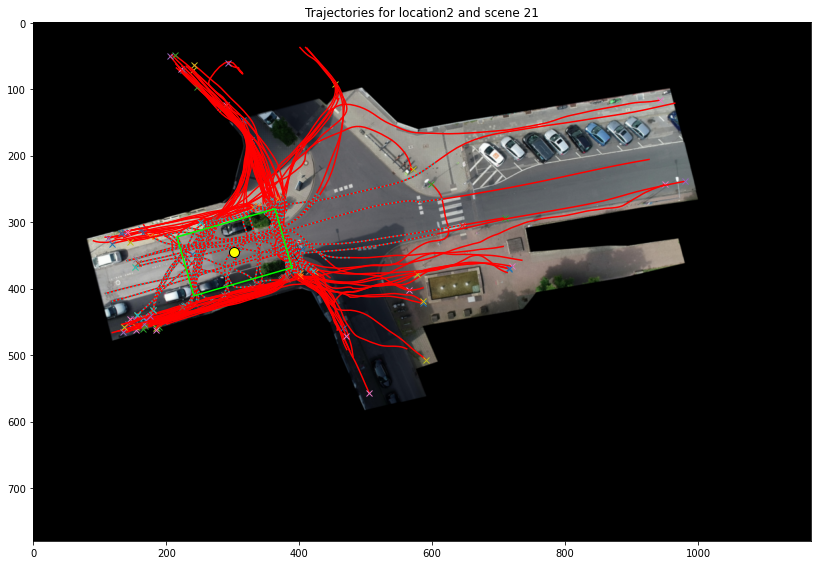

In [27]:

visualizer.showLocationSceneData(scene10, onlyClipped=False, showOthers=False)